# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2024-2
---
1. Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$

---

2. El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.


---
3.  El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres al español.


b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.



Ingrese la velocidad de la moto: 15
Ingrese la aceleración del policia: 3


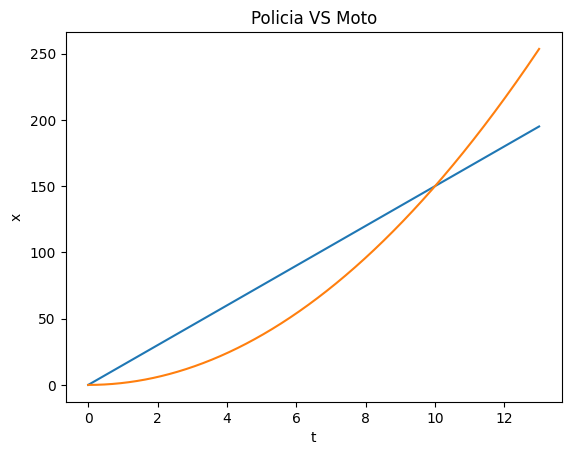

In [ ]:
'''Punto 1'''
import matplotlib.pyplot as plt
import numpy as np


v_moto = float(input("Ingrese la velocidad de la moto: "))
a_policia = float(input("Ingrese la aceleración del policia: "))
t = (2*v_moto)/a_policia
t_ = np.linspace(0,t+0.3*t, 1000)
x_i = 0

x_moto = x_i + v_moto*t_
x_pol  = x_i + (1/2)*a_policia*t_**2


plt.plot(t_, x_moto)
plt.plot(t_, x_pol)
plt.title("Policia VS Moto")
plt.xlabel("t")
plt.ylabel("x")
plt.show()

El punto de equilibrio no coincide
-0.9999875642806766 != 1.0905077326652577


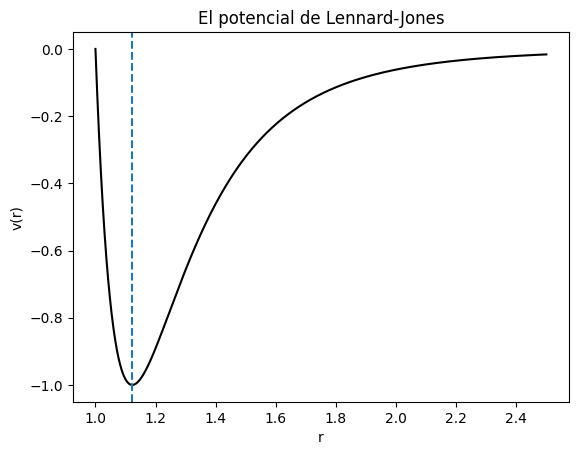

In [ ]:
'''Punto 2'''
import numpy as np
import matplotlib.pyplot as plt

sigma = 1
epsilon = 1
r_ = np.linspace(sigma, 2.5*sigma, 1000)
vr = (4*epsilon)*((sigma/r_)**12 - (sigma/r_)**6)
minimo = np.argmin(vr)
print("El punto de equilibrio no coincide")
print(vr.min(), "!=", 2**(2/16))

plt.plot(r_, vr, "black")
plt.axvline(r_[minimo], linestyle = "--")
plt.title("El potencial de Lennard-Jones")
plt.xlabel("r")
plt.ylabel("v(r)")
plt.show()

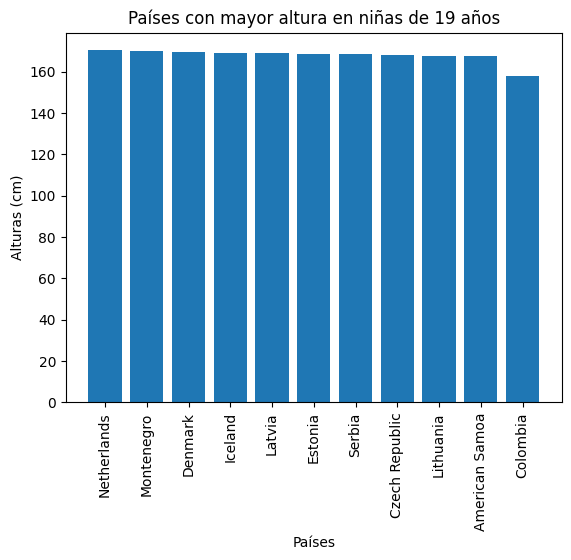

In [42]:
'''Punto 3'''

import pandas as pd
import matplotlib.pyplot as plt

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]


alturas = alturas.drop(columns = ["Boys 19 (in)", "Girls 19 (in)"])


#Punto a
nuevos_nombres = { 'Country' : 'País', 'Average Height, Boys, 19 yo (cm)' : 'Niños 19 (cm)', 'Girls 19 (cm)' : 'Niñas 19 (cm)', 'Boys 15 (cm)' : 'Niños 15 (cm)',
                  'Girls 15 (cm)' : 'Niñas 15 (cm)', 'Boys 10 (cm)' : 'Niños 10 (cm)', 'Girls 10 (cm)' : 'Niñas 10 (cm)', 'Boys 5 (cm)' : 'Niños 5 (cm)',
                   'Girls 5 (cm)' : 'Niñas 5 (cm)' }

alturas = alturas.rename(columns = nuevos_nombres)

alturas = alturas.sort_values(by='Niñas 19 (cm)', ascending=False)

posicion = alturas[alturas['País'] == 'Colombia']

#Punto b
categorias = pd.concat([alturas['País'].head(10), posicion['País']])
valores = pd.concat([alturas['Niñas 19 (cm)'].head(10),posicion['Niñas 19 (cm)']])
plt.bar(categorias, valores)
plt.title("Países con mayor altura en niñas de 19 años")
plt.xlabel("Países")
plt.ylabel("Alturas (cm)")
plt.xticks(rotation = 90)
plt.show()



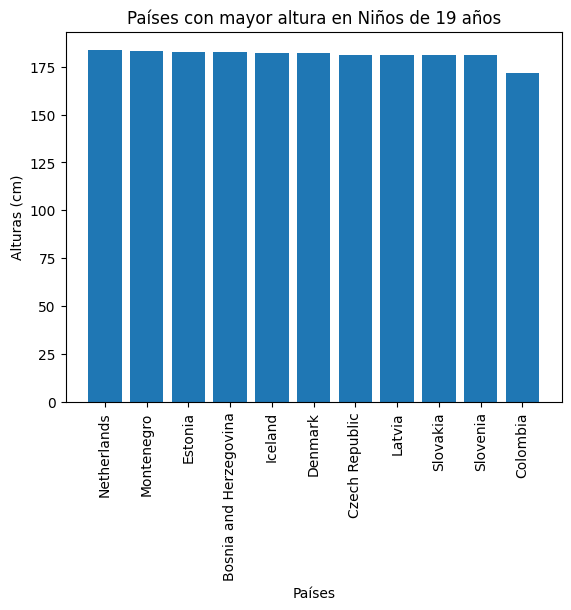

In [ ]:
alturas = alturas.sort_values(by='Niños 19 (cm)', ascending=False)

posicion = alturas[alturas['País'] == 'Colombia']

categorias = pd.concat([alturas['País'].head(10), posicion['País']])
valores = pd.concat([alturas['Niños 19 (cm)'].head(10),posicion['Niños 19 (cm)']])
plt.bar(categorias, valores)
plt.title("Países con mayor altura en Niños de 19 años")
plt.xlabel("Países")
plt.ylabel("Alturas (cm)")
plt.xticks(rotation = 90)
plt.show()


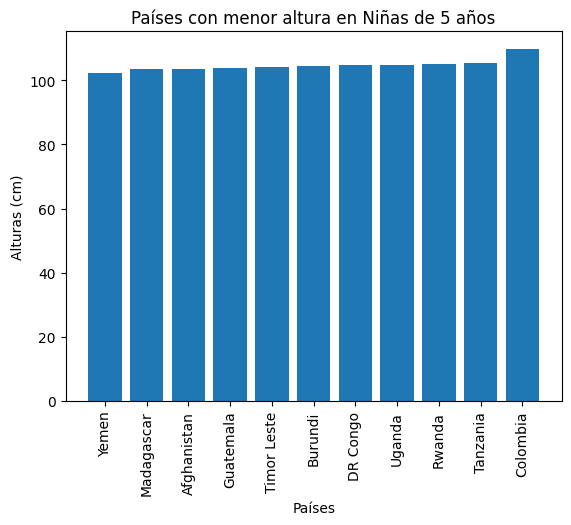

In [44]:
alturas = alturas.sort_values(by='Niñas 5 (cm)', ascending=True)

posicion = alturas[alturas['País'] == 'Colombia']

categorias = pd.concat([alturas['País'].head(10), posicion['País']])
valores = pd.concat([alturas['Niñas 5 (cm)'].head(10),posicion['Niñas 5 (cm)']])
plt.bar(categorias, valores)
plt.title("Países con menor altura en Niñas de 5 años")
plt.xlabel("Países")
plt.ylabel("Alturas (cm)")
plt.xticks(rotation = 90)
plt.show()

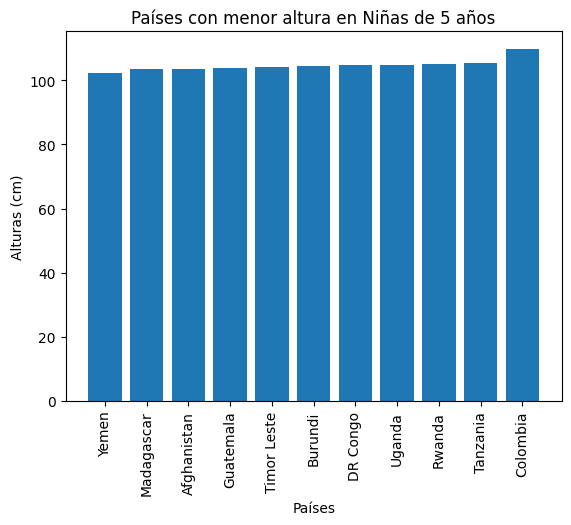

In [40]:
alturas = alturas.sort_values(by='Niñas 5 (cm)', ascending=True)

posicion = alturas[alturas['País'] == 'Colombia']

categorias = pd.concat([alturas['País'].head(10), posicion['País']])
valores = pd.concat([alturas['Niñas 5 (cm)'].head(10),posicion['Niñas 5 (cm)']])
plt.bar(categorias, valores)
plt.title("Países con menor altura en Niñas de 5 años")
plt.xlabel("Países")
plt.ylabel("Alturas (cm)")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
nuevo_nombre={'Country':'País'}
income = income.rename(columns = nuevo_nombre)
income.head()

,País,Total Wealth (billions USD),GDP per Adult (USD),Wealth per Adult (USD),Share of World Wealth
0,United States,"$145,793","$91,340","$579,051",31.45%
1,China,"$85,107","$15,765","$76,639",18.36%
2,Japan,"$25,692","$45,449","$245,238",5.54%
3,Germany,"$17,489","$59,423","$256,985",3.77%
4,United Kingdom,"$16,261","$59,377","$309,375",3.51%


In [37]:
unido = alturas.merge(income,how='inner', on= 'País')
unido.head()
unido['GDP per Adult (USD)']=unido['GDP per Adult (USD)'].astype('string')
unido['GDP per Adult (USD)']=unido['GDP per Adult (USD)'].str.slice(start=1)
unido['GDP per Adult (USD)']=unido['GDP per Adult (USD)'].str.replace(',','')
unido['GDP per Adult (USD)']=unido['GDP per Adult (USD)'].astype('float64')



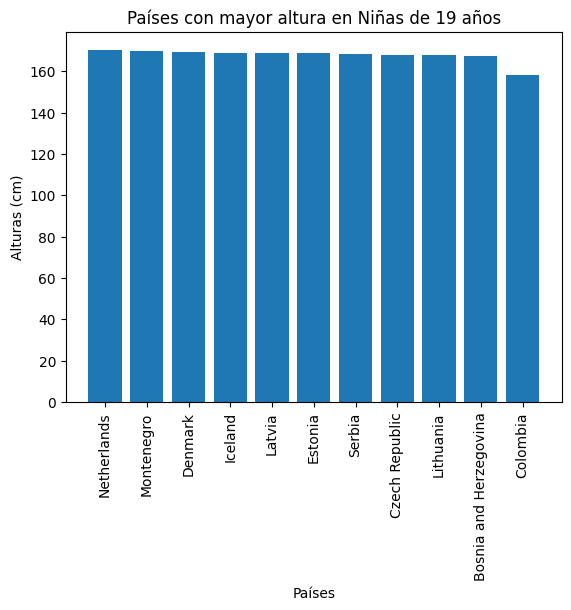

In [45]:
unido = unido.sort_values(by='Niñas 19 (cm)', ascending=False)

posicion = unido[unido['País'] == 'Colombia']

categorias = pd.concat([unido['País'].head(10), posicion['País']])
valores = pd.concat([unido['Niñas 19 (cm)'].head(10),posicion['Niñas 19 (cm)']])
plt.bar(categorias, valores)
plt.title("Países con mayor altura en Niñas de 19 años")
plt.xlabel("Países")
plt.ylabel("Alturas (cm)")
plt.xticks(rotation = 90)
plt.show()


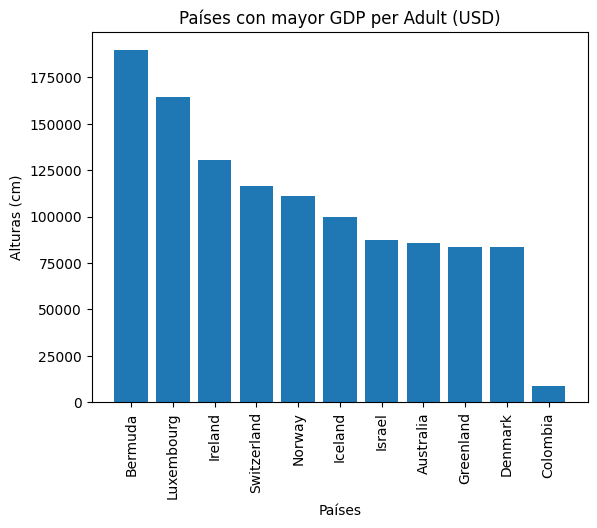

In [39]:
unido = unido.sort_values(by='GDP per Adult (USD)', ascending=False)

posicion = unido[unido['País'] == 'Colombia']

categorias = pd.concat([unido['País'].head(10), posicion['País']])
valores = pd.concat([unido['GDP per Adult (USD)'].head(10),posicion['GDP per Adult (USD)']])
plt.bar(categorias, valores)
plt.title("Países con mayor PIB por adulto (USD)")
plt.xlabel("Países")
plt.ylabel("Alturas (cm)")
plt.xticks(rotation = 90)
plt.show()